In [235]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

sns.set_style("whitegrid")

In [236]:
N_ITER = 50         # Number of iterations of training a RF (i.e. number of forests)
CLASS_SPECIFIC_MEASURES = ["pathPow", "strictNodePow", "cumNodePow", "Perm"]
CLASS_INDEPENDENT_MEASURES = ["Gini", "Count", "Permutation"]

In [237]:
def read_importance_data(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    importances = {
        "feature": [],
        "importance": [],
    }
    for line in data:
        f, imp = line.rstrip('\n').split(" ")
        importances["feature"].append(round(float(f)))
        importances["importance"].append(float(imp))
    return importances
    
def plot_importances(importances, limit):
    df = pd.DataFrame(importances)
    df['iter'] = df.reset_index()["index"].apply(lambda x: int(x / 200))
    top_k_data = df[df["feature"] <= limit]
    sns.boxplot(x="feature", y="importance", data=top_k_data, palette="Set2")
    plt.show()

In [265]:
DATA_SETS = [
    # data directory          top_k       num_classes
    ("toys/single_run_fixed", 10,         2),
    ("wdbc/single_run_fixed", 30,         2),
    ("wine/single_run_fixed", 13,         3),
    ("segmentation/single_run_fixed", 19, 7),
]

Dataset: toys/single_run_fixed, measure: pathPow1


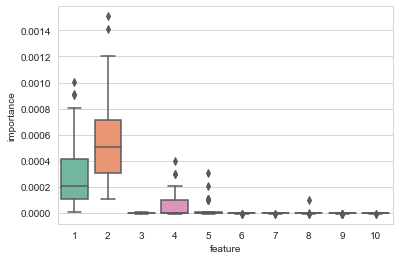

Dataset: toys/single_run_fixed, measure: pathPow2


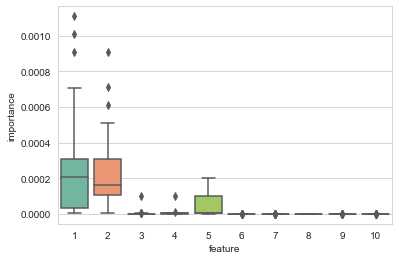

Dataset: toys/single_run_fixed, measure: strictNodePow1


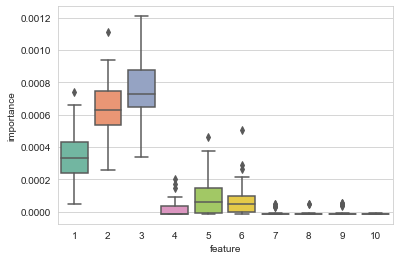

Dataset: toys/single_run_fixed, measure: strictNodePow2


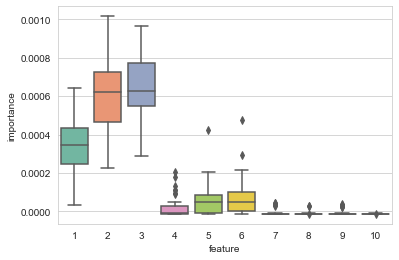

Dataset: toys/single_run_fixed, measure: cumNodePow1


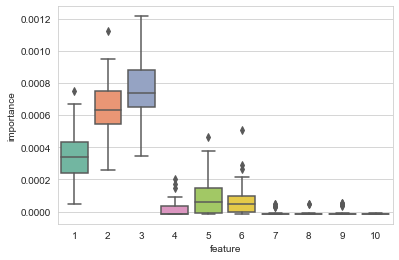

Dataset: toys/single_run_fixed, measure: cumNodePow2


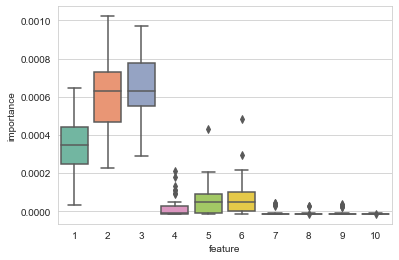

Dataset: toys/single_run_fixed, measure: Perm1


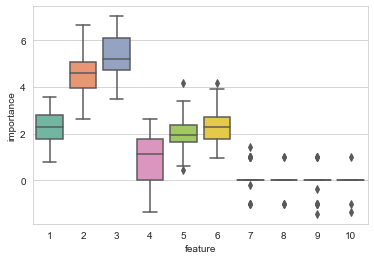

Dataset: toys/single_run_fixed, measure: Perm2


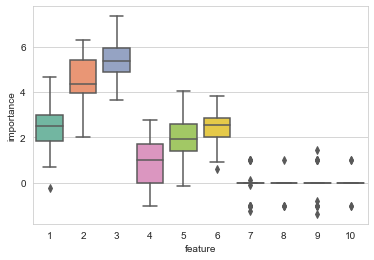

Dataset: toys/single_run_fixed, measure: Gini


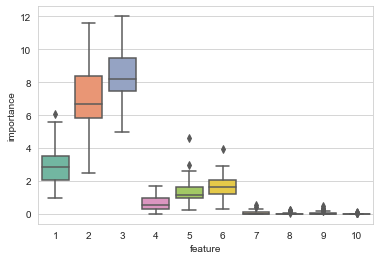

Dataset: toys/single_run_fixed, measure: Count


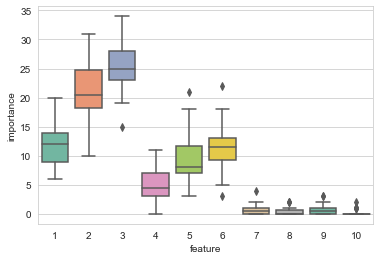

Dataset: toys/single_run_fixed, measure: Permutation


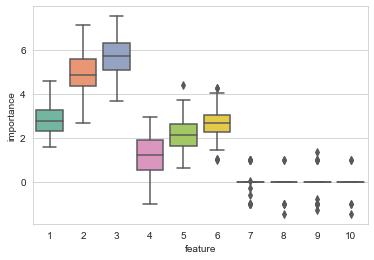

Dataset: wdbc/single_run_fixed, measure: pathPow1


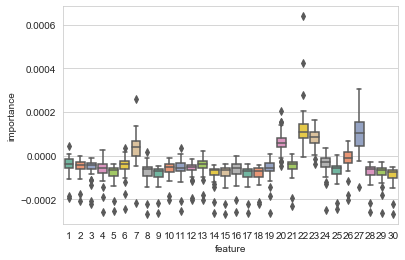

Dataset: wdbc/single_run_fixed, measure: pathPow2


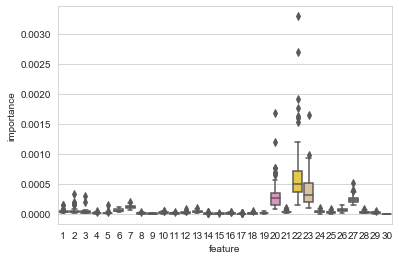

Dataset: wdbc/single_run_fixed, measure: strictNodePow1


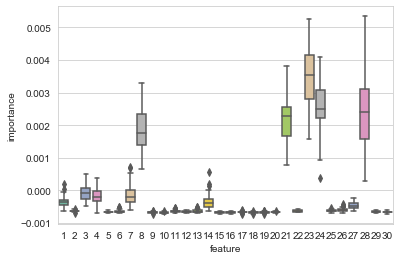

Dataset: wdbc/single_run_fixed, measure: strictNodePow2


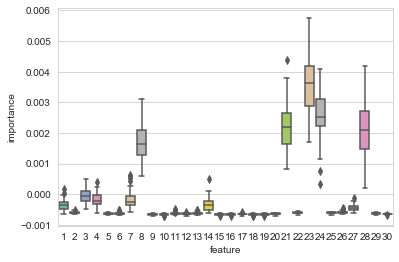

Dataset: wdbc/single_run_fixed, measure: cumNodePow1


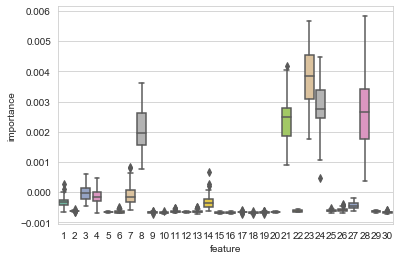

Dataset: wdbc/single_run_fixed, measure: cumNodePow2


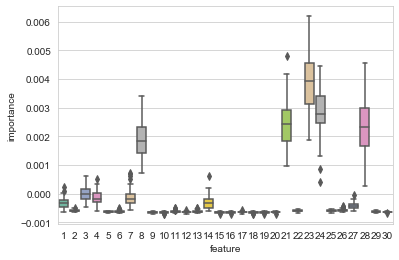

Dataset: wdbc/single_run_fixed, measure: Perm1


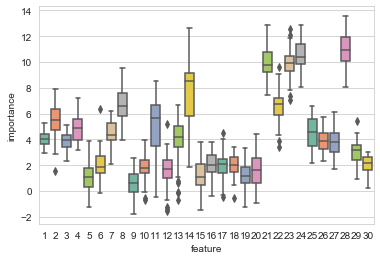

Dataset: wdbc/single_run_fixed, measure: Perm2


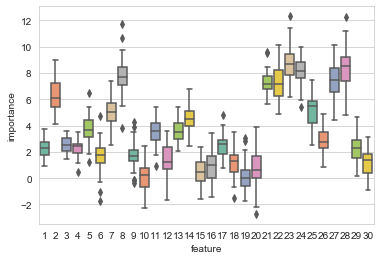

Dataset: wdbc/single_run_fixed, measure: Gini


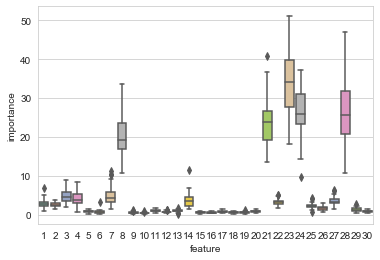

Dataset: wdbc/single_run_fixed, measure: Count


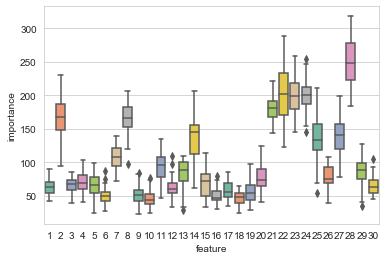

Dataset: wdbc/single_run_fixed, measure: Permutation


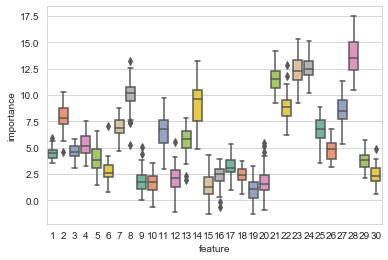

Dataset: wine/single_run_fixed, measure: pathPow1


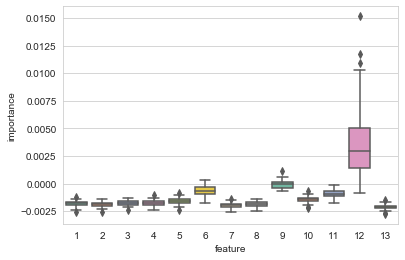

Dataset: wine/single_run_fixed, measure: pathPow2


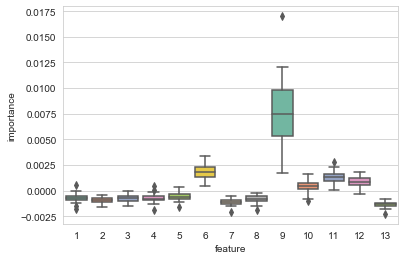

Dataset: wine/single_run_fixed, measure: strictNodePow1


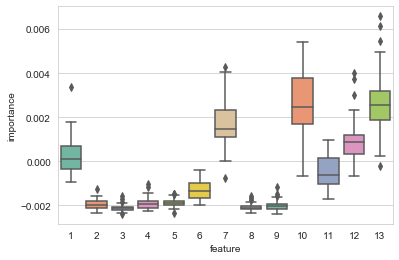

Dataset: wine/single_run_fixed, measure: strictNodePow2


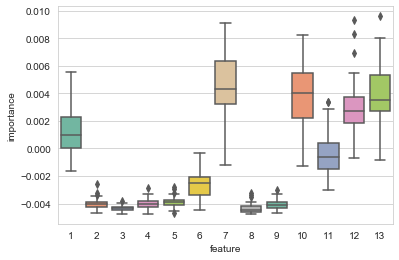

Dataset: wine/single_run_fixed, measure: cumNodePow1


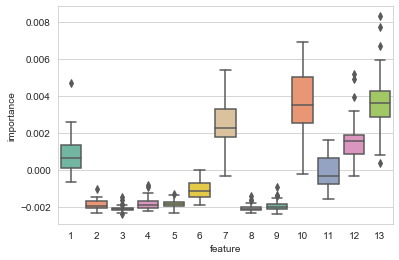

Dataset: wine/single_run_fixed, measure: cumNodePow2


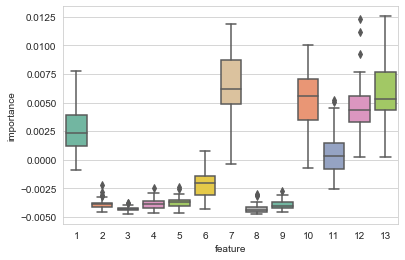

Dataset: wine/single_run_fixed, measure: Perm1


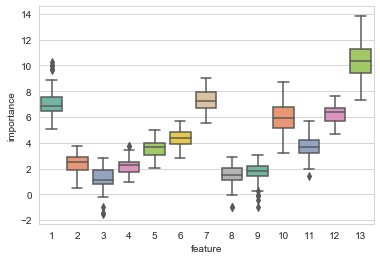

Dataset: wine/single_run_fixed, measure: Perm2


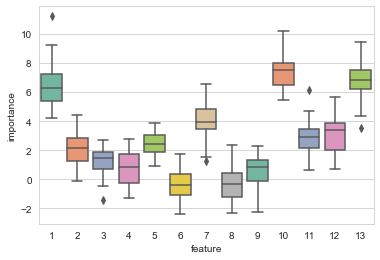

Dataset: wine/single_run_fixed, measure: Gini


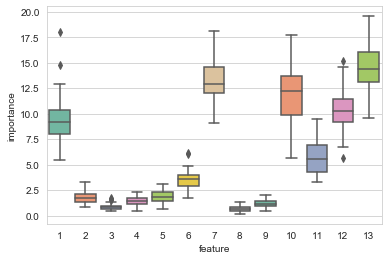

Dataset: wine/single_run_fixed, measure: Count


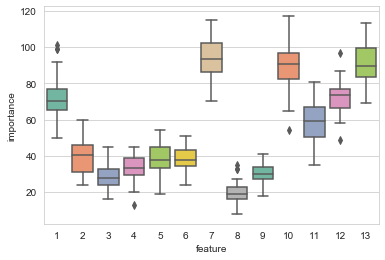

Dataset: wine/single_run_fixed, measure: Permutation


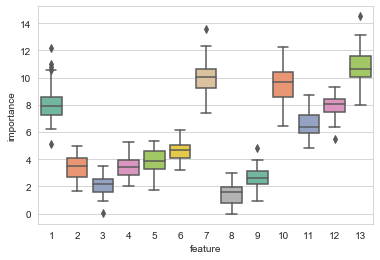

Dataset: segmentation/single_run_fixed, measure: pathPow1


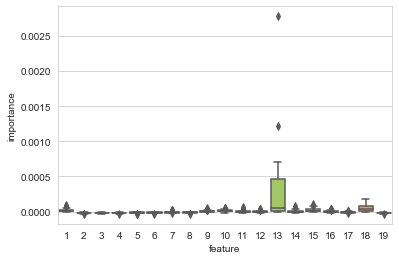

Dataset: segmentation/single_run_fixed, measure: pathPow2


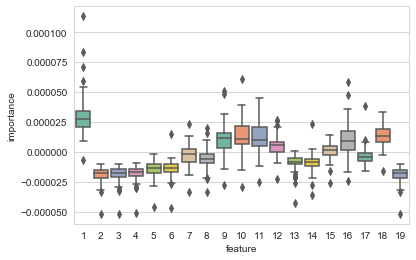

Dataset: segmentation/single_run_fixed, measure: strictNodePow1


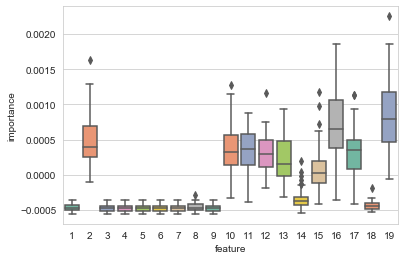

Dataset: segmentation/single_run_fixed, measure: strictNodePow2


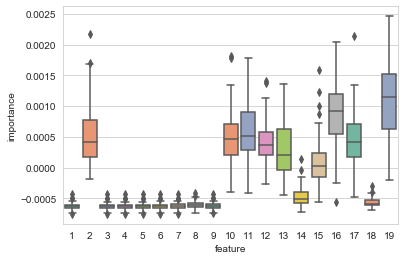

Dataset: segmentation/single_run_fixed, measure: cumNodePow1


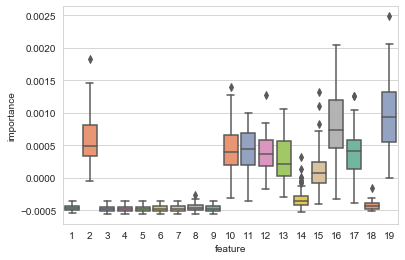

Dataset: segmentation/single_run_fixed, measure: cumNodePow2


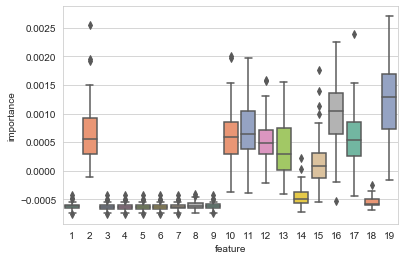

Dataset: segmentation/single_run_fixed, measure: Perm1


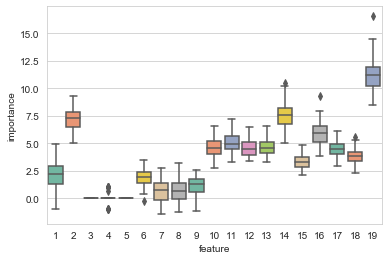

Dataset: segmentation/single_run_fixed, measure: Perm2


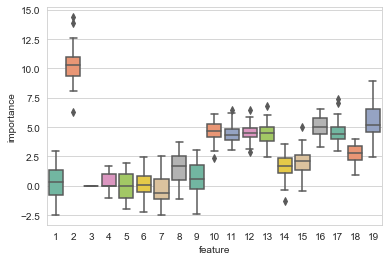

Dataset: segmentation/single_run_fixed, measure: Gini


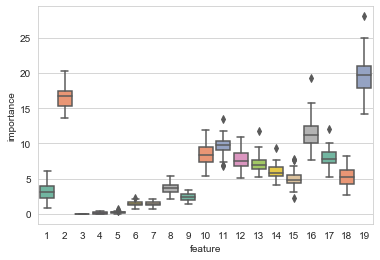

Dataset: segmentation/single_run_fixed, measure: Count


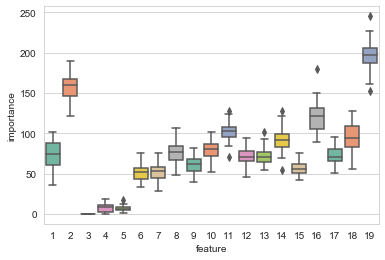

Dataset: segmentation/single_run_fixed, measure: Permutation


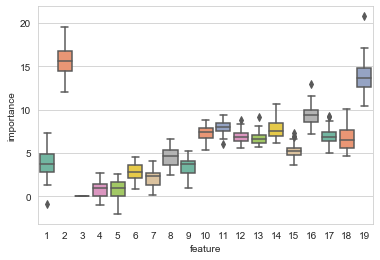

In [239]:
for data_dir, k, _ in DATA_SETS:
    for measure in CLASS_SPECIFIC_MEASURES:
        for c in range(1, 3):
            full_measure = measure + str(c)
            print("Dataset: " + data_dir + ", measure: " + full_measure)
            filename = os.path.join(data_dir, full_measure + ".txt")
            importances = read_importance_data(filename)
            plot_importances(importances, k)

    for measure in CLASS_INDEPENDENT_MEASURES:
        filename = os.path.join(data_dir, measure + ".txt")
        print("Dataset: " + data_dir + ", measure: " + measure)
        importances = read_importance_data(filename)
        plot_importances(importances, k)

In [306]:
def read_correlation_data(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    num_columns = len(data[2].rstrip('\n').split('\t'))
    vals = []
    for i, line in enumerate(data[2:]):
        vals.append(list(line.rstrip('\n').split('\t')))
        if i == num_columns - 1:
            break
    return vals

def postprocess_data(data, num_classes):
    class_measures = []
    for m in CLASS_SPECIFIC_MEASURES:
        for c in range(1, num_classes + 1):
            class_measures.append(m + str(c))
    rename_mapping = {i: x for i, x in enumerate(class_measures + CLASS_INDEPENDENT_MEASURES)}
    data = data.rename(columns=rename_mapping, index=rename_mapping)
    return data

def plot_correlations(data):
    sns.heatmap(data, cmap="PiYG")
    plt.show()

Dataset:  toys/single_run_fixed


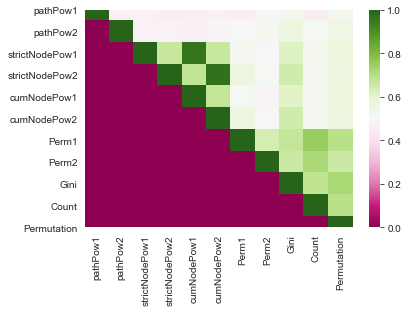

Dataset:  wdbc/single_run_fixed


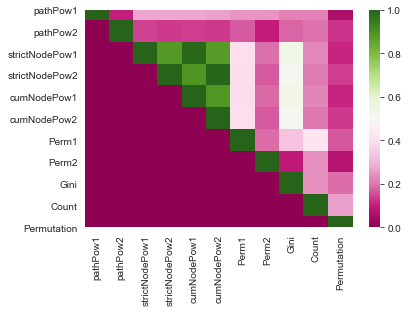

Dataset:  wine/single_run_fixed


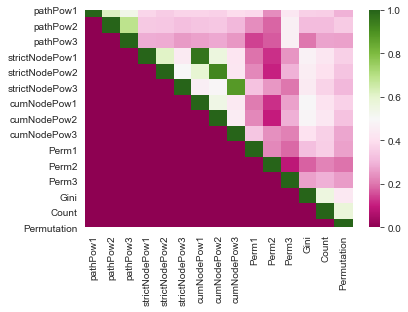

Dataset:  segmentation/single_run_fixed


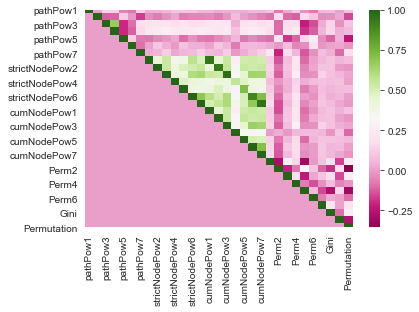

In [308]:
for data_dir, _, num_classes in DATA_SETS:
    print("Dataset: ", data_dir)
    filename = os.path.join(data_dir, "correlation_results.txt")
    correlation_data = pd.DataFrame(read_correlation_data(filename), dtype=np.float64)
    correlation_data = postprocess_data(correlation_data, num_classes)
    plot_correlations(correlation_data)

Dataset:  toys/single_run_fixed


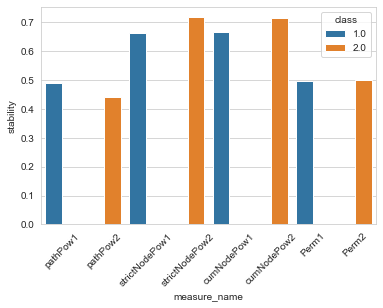

Dataset:  wdbc/single_run_fixed


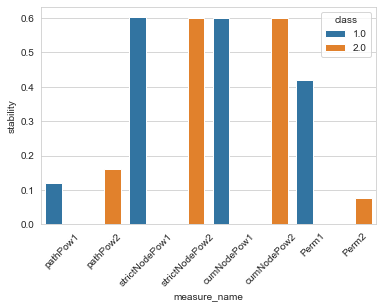

Dataset:  wine/single_run_fixed


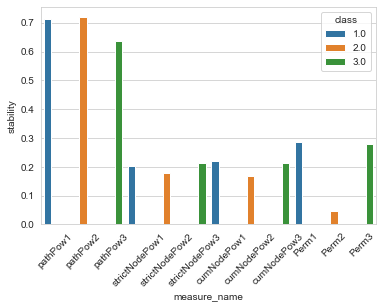

Dataset:  segmentation/single_run_fixed


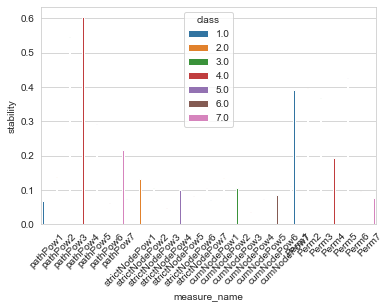

In [334]:
for data_dir, _, num_classes in DATA_SETS:
    print("Dataset: ", data_dir)
    data = {
        "measure_name": [],
        "stability": [],
        "class": [],
    }
    for m in CLASS_SPECIFIC_MEASURES:
        for c in range(1, num_classes + 1):
            measure_name = m + str(c)
            filename = os.path.join(data_dir, "meanCorr" + measure_name + ".txt")
            with open(filename, 'r') as f:
                stability = float(f.readlines()[0].rstrip('\n'))
            data["stability"].append(stability)
            data["measure_name"].append(measure_name)
            data["class"].append(c)
    for m in CLASS_INDEPENDENT_MEASURES:
        filename = os.path.join(data_dir, "meanCorr" + m + ".txt")
        with open(filename, 'r') as f:
            stability = float(f.readlines()[0].rstrip('\n'))
        data["stability"].append(stability)
        data["measure_name"].append(measure_name)
        data["class"].append(None)
    data = pd.DataFrame(data)
    ax = sns.barplot(x="measure_name", y="stability", hue="class", data=data, ci=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()
#     correlation_data = pd.DataFrame(read_correlation_data(filename), dtype=np.float64)
#     correlation_data = postprocess_data(correlation_data, num_classes)
#     plot_correlations(correlation_data)